In [349]:
# Importing libraries
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# from keras.applications.inception_v3 import InceptionV3, preprocess_input
# from keras import optimizers
# from keras.models import Sequential, Model 
# from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
# from keras.callbacks import ModelCheckpoint
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.utils import np_utils
# import tensorflow as tf

# from IPython.core.display import display, HTML
from PIL import Image
# from io import BytesIO
# import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import plotly.express as px

In [350]:
# Creating Variables
dir = '/Users/amanueltesfaye/Documents/Amherst College/Classes/Spring 2023/Deep Learning/Final Project/celebA dataset/'
images_dir = dir + 'img_align_celeba/img_align_celeba/'

TRAINING_SAMPLES = 10000 # Defining the amount of samples for the training set
VALIDATION_SAMPLES = 2000 # Defining the amount of samples for the validation set
TEST_SAMPLES = 2000 # Defining the amount of samples for the testing set
IMG_WIDTH = 178 # Setting image width
IMG_HEIGHT = 218 # Setting image height

# Importing & Exploring Datasets

In [351]:
attributes_df = pd.read_csv(dir + 'list_attr_celeba.csv', delimiter=',')
print(f'There are {attributes_df.shape[0]} rows and {attributes_df.shape[1]} columns')

There are 202599 rows and 41 columns


In [352]:
attributes_df.head(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [353]:
bbox_df = pd.read_csv(dir + 'list_bbox_celeba.csv', delimiter=',')
print(f'There are {bbox_df.shape[0]} rows and {bbox_df.shape[1]} columns')

There are 202599 rows and 5 columns


In [354]:
bbox_df.head(5)

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [355]:
partition_df = pd.read_csv(dir + 'list_eval_partition.csv', delimiter=',')
print(f'There are {partition_df.shape[0]} rows and {partition_df.shape[1]} columns')

There are 202599 rows and 2 columns


In [356]:
partition_df 

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


# Visualizing Data

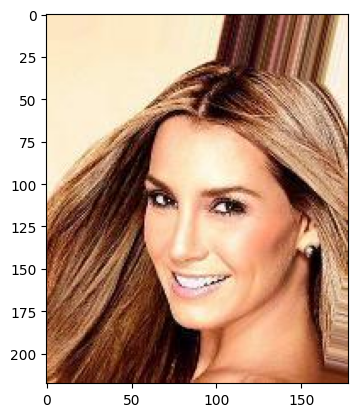

In [357]:
# Plotting the first image in our dataset
i = 1
image = dir + f'img_align_celeba/img_align_celeba/00000{i}.jpg'
img = mpimg.imread( image )
imgplot = plt.imshow( img )
plt.show()


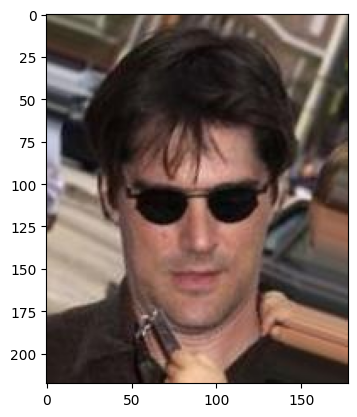

In [358]:
j = 53
image2 = dir + f'img_align_celeba/img_align_celeba/0000{j}.jpg'
img2 = mpimg.imread( image2 )
imgplot2 = plt.imshow( img2 )
plt.show()

In [359]:
# Changing -1's to 0

attributes_df.set_index('image_id', inplace = True) # Setting 'image_id' column as Index
attributes_df.replace(to_replace = -1, value = 0,inplace = True ) # Replacing '-1' values for '0', indicating the absence of attributes in the image
attributes_df.head(10) # Displaying dataframe after changes 

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
000006.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
000007.jpg,1,0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
000008.jpg,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
000009.jpg,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [360]:
# Displaying all attributes 
attributes_df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [361]:
# Creating 'Eyeglasses' dataframe
eye_glasses_df = attributes_df[['Eyeglasses']]
eye_glasses_df

,Eyeglasses
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0
...,...
202595.jpg,0
202596.jpg,0
202597.jpg,1


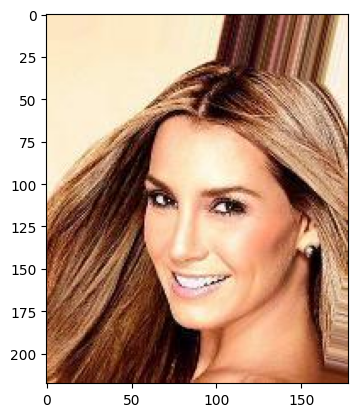

Eyeglasses    0
Name: 000001.jpg, dtype: int64

In [362]:
# Displaying picture and 'Eye Glasses' column label
img = mpimg.imread( image )
imgplot = plt.imshow( img )
plt.show()
eye_glasses_df.loc[image.split('/')[-1]][['Eyeglasses']]

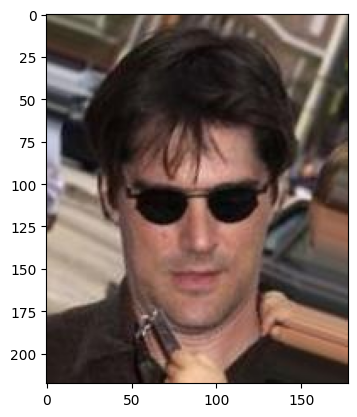

Eyeglasses    1
Name: 000053.jpg, dtype: int64

In [363]:
img2 = mpimg.imread( image2 )
imgplot2 = plt.imshow( img2 )
plt.show()
eye_glasses_df.loc[image2.split('/')[-1]][['Eyeglasses']]

In [364]:
# Number of images with Eyeglasses on in our data set
attributes_df['Eyeglasses'].value_counts()[1]


13193

In [365]:
# Number of images without Eyeglasses on in our data set
attributes_df['Eyeglasses'].value_counts()[1]

13193

In [366]:
# Setting index for 'partitions_df'
partition_df.set_index('image_id', inplace = True)
partition_df

,partition
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0
...,...
202595.jpg,2
202596.jpg,2
202597.jpg,2


In [367]:
# Merging dataframes
merged_df = eye_glasses_df.merge(partition_df['partition'], left_index = True, right_index = True)
merged_df

,Eyeglasses,partition
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,0,0
000004.jpg,0,0
000005.jpg,0,0
...,...,...
202595.jpg,0,2
202596.jpg,0,2
202597.jpg,1,2


In [368]:
# # Loading Images
# def load_reshape_img(fname):
#     img = load_img(fname) # Loading image 
#     x = img_to_array(img)/255. # Converting to array and normalizing
#     x = x.reshape((1,) + x.shape) # Reshaping array to have an extra dimension of size 1

#     return x


# # Generating datasets
# def sets_generator(partition, attribute, num_samples):
    
#     # Creating 'df_' dataframe, consisting of an equal number of samples for male and female images
#     # by selecting half of the samples with a value of 0 and half with a value of 1 from 'data' dataframe
#     df_ = merged_df[(merged _df['partition'] == partition) 
#                            & (merged_df[attribute] == 0)].sample(int(num_samples/2))
#     df_ = pd.concat([df_,
#                       merged_df[(merged_df['partition'] == partition) 
#                                   & (merged_df[attribute] == 1)].sample(int(num_samples/2))])

#     # For the training and validation sets
#     if partition != 2:
        
#         # Loading images and storing them in the 'x_' array
#         x_ = np.array([load_reshape_img(images_dir + fname) for fname in df_.index])
#         x_ = x_.reshape(x_.shape[0], 218, 178, 3)
        
#         # Storing target variable in the 'y_' array
#         y_ = np_utils.to_categorical(df_[attribute],2) # Converting binary attributes to categorical variables
        
#     # For the testing set
#     else:
#         x_ = []
#         y_ = []

#         for index, target in df_.iterrows():
            
#             # Taking images as input and resizing
#             im = cv2.imread(images_dir + index)
#             im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
#             im = np.expand_dims(im, axis =0)
#             x_.append(im) # Storing in normalized images
#             y_.append(target[attribute]) # Storing in the target variable

#     return x_, y_

In [369]:
# X_train, y_train = sets_generator(0, 'Male', TRAINING_SAMPLES)